# Task 2d Solution

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
sci = np.load('data/detection_sci.npy') # read detection sci image
wht = np.load('data/detection_wht.npy') # read detection wht image

--- cut out a portion of the image for analysis

In [3]:
x = 800 # x-center of the image
y = 800 # y-center of the image
r = 200 # width/2 of cutout, must be int

In [4]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [5]:
noise = 1./np.sqrt(wht) # conversion from weight to noise
sig = sci/noise # significance map

--- now run segmentation on the image. Repeat of task 2c.

In [6]:
from photutils import detect_sources

In [7]:
threshold = 5
npixels = 10

In [8]:
segm = detect_sources(sig, threshold, npixels)

In [9]:
from photutils import deblend_sources

In [10]:
segm_deblend = deblend_sources(sig, segm, npixels=5, nlevels=32, contrast=0.001)

--- now expore various choices of parameters. Task 2d:

In [11]:
npixels_ = np.arange(1,10,1)       #Produce range of values for significance and number of connected pixels parameters
threshold_ = np.arange(0.5,8.,0.5)

In [12]:
N = np.zeros((npixels_.size, threshold_.size))
print(N.shape)

(9, 15)


In [13]:
for i, npixels in enumerate(npixels_):
    for j, threshold in enumerate(threshold_):
        segm = detect_sources(sig, threshold, npixels)
        n = np.max(segm.data)
        N[i,j] = n

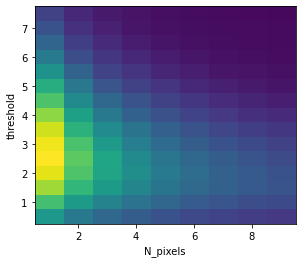

In [14]:
plt.imshow(N.T, extent = (npixels_[0]-(npixels_[1]-npixels_[0])/2.,npixels_[-1]+(npixels_[1]-npixels_[0])/2.,threshold_[0]-(threshold_[1]-threshold_[0])/2.,threshold_[-1]+(threshold_[1]-threshold_[0])/2.), origin='lower', vmin = 0)
plt.xlabel('N_pixels')
plt.ylabel('threshold')
plt.show()